# Likelihoods check 

As the other `check_likelihood_curves` notebooks, but now with the $\chi$ parameteriation 

# Setup 

In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
import sys
try:
    sys.path.remove("../src") # Remove src if already exists 
except:
    pass
sys.path.append("../src") # Means that I dont have to make src/ a proper python package

# Synthetic data 

We generate synthetic data to test our scheme. 

Lets make sure this looks reasonable 

In [27]:
from system_parameters import SystemParameters
from pulsars import Pulsars
from synthetic_data import SyntheticData
import numpy as np 
from model import PhaseModel
from kalman_filter_optimised import KalmanFilter
from priors import bilby_priors_dict
import matplotlib.pyplot as plt 
P   = SystemParameters(σm=5e-7)    # User-specifed system parameters
PTA = Pulsars(P)            # All pulsar-related quantities
data = SyntheticData(PTA,P) # Given the user parameters and the PTA configuration, create some synthetic data    




def iterate_over_ll(data,parameter_name,parameter_value,P,PTA):
   

    #Define the model to be used by the Kalman Filter
    model = PhaseModel(P,PTA)


    #Initialise the Kalman filter
    KF = KalmanFilter(model,data.phi_measured,PTA)



    inits, constrained_prior = bilby_priors_dict(PTA,P,set_state_parameters_as_known=True,set_measurement_parameters_as_known=True)
    optimal_parameters = constrained_prior.sample(1)
    optimal_parameters[parameter_name] = np.array([parameter_value])
    ll= KF.likelihood(optimal_parameters)

    return ll 



# All $\chi$ values  

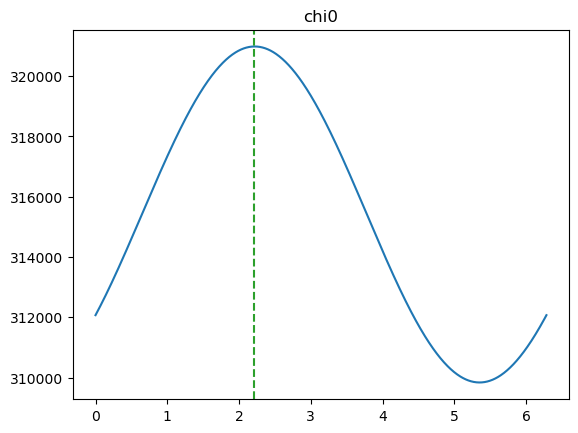

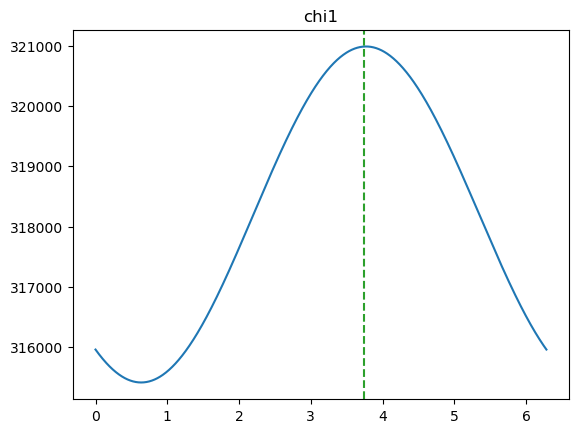

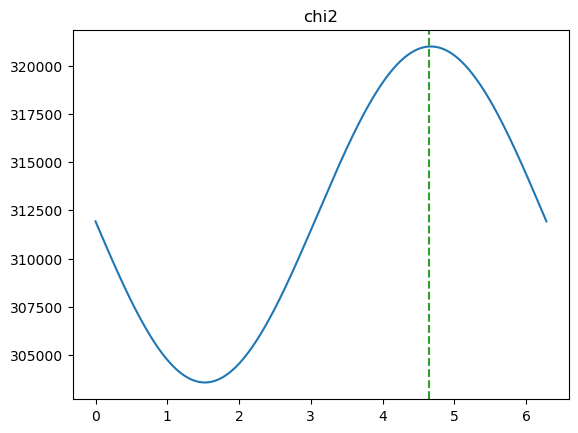

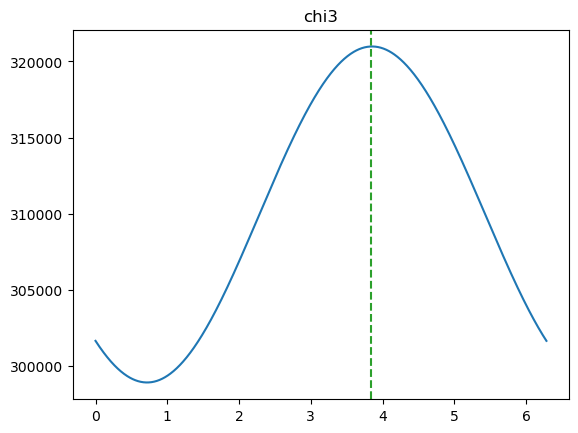

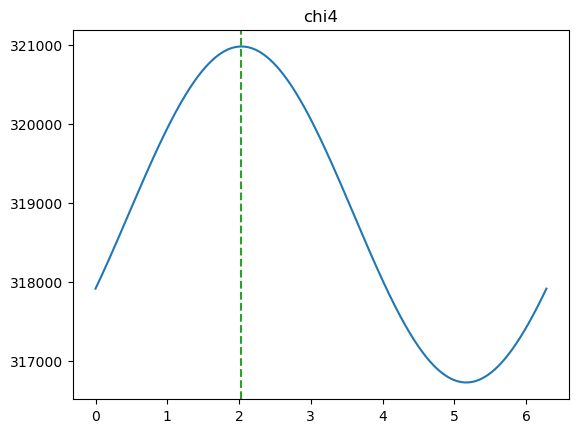

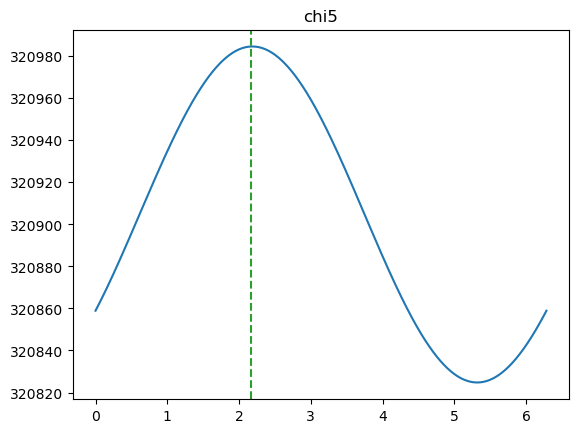

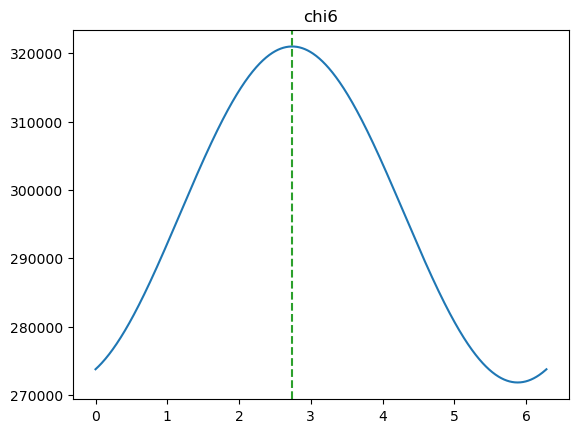

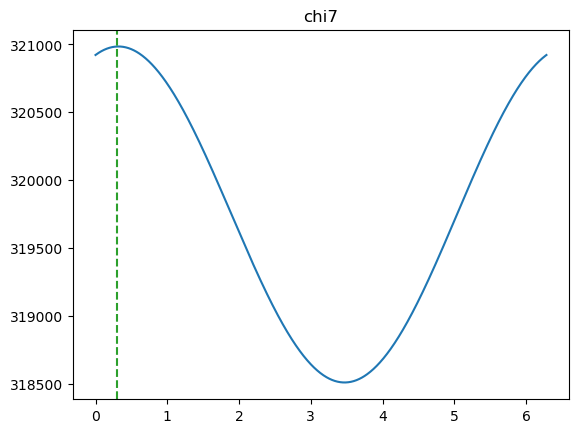

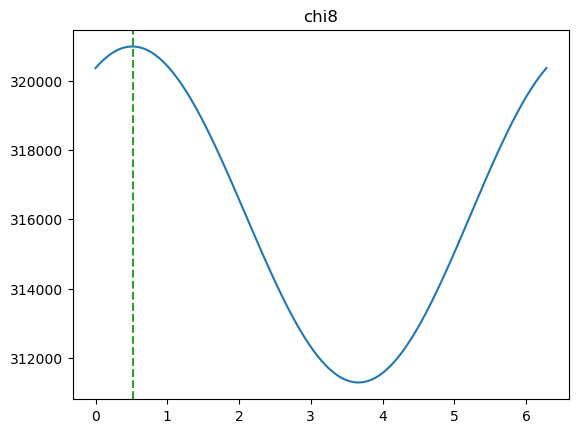

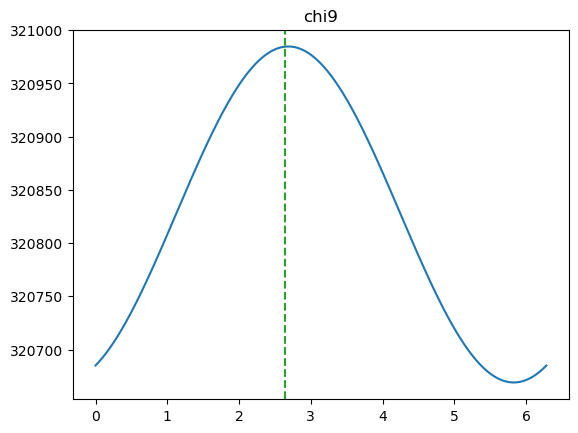

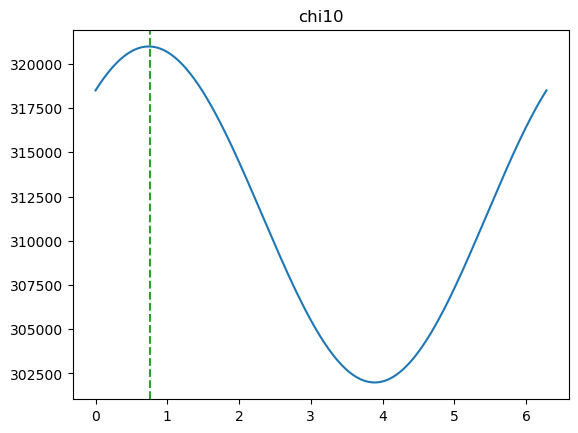

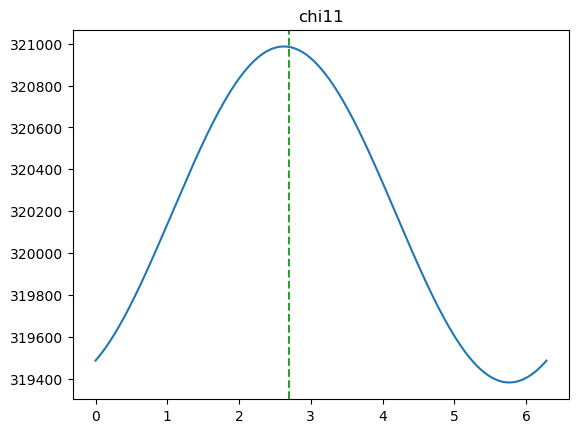

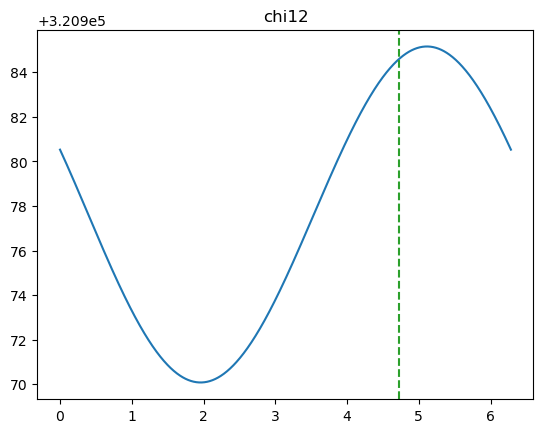

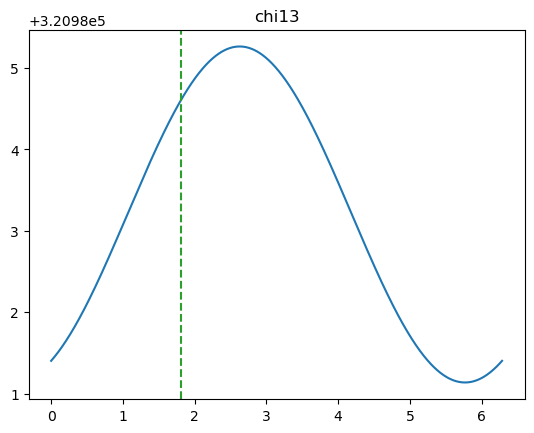

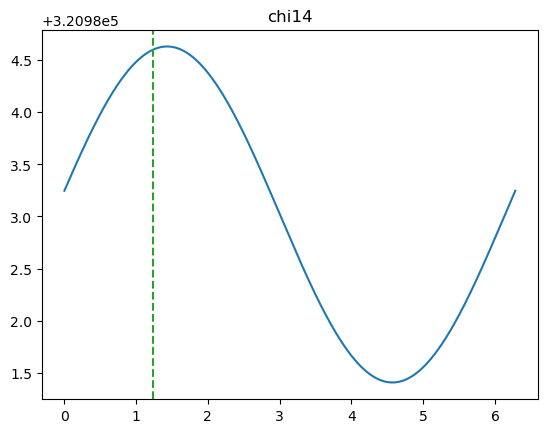

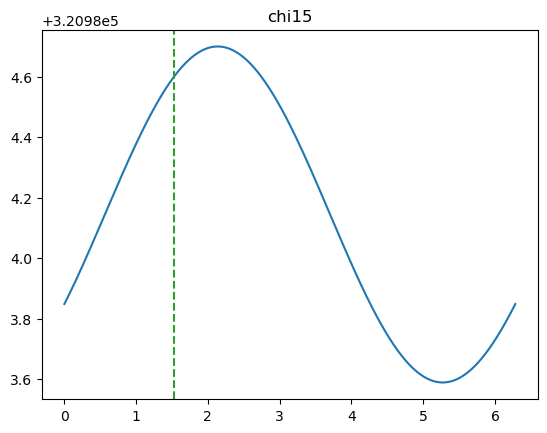

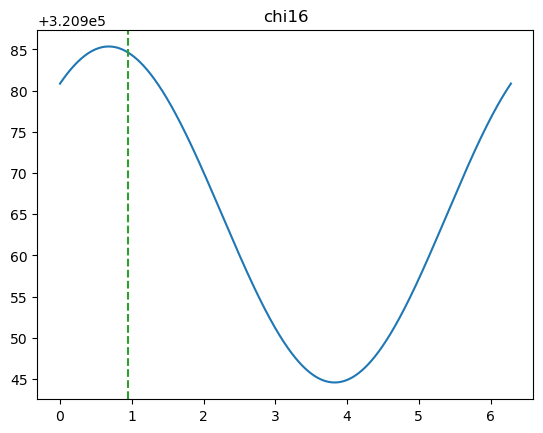

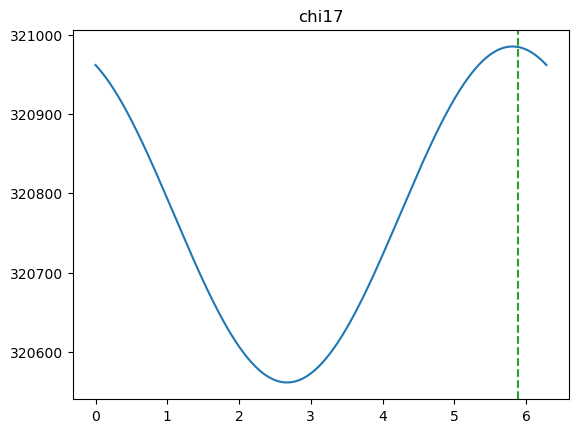

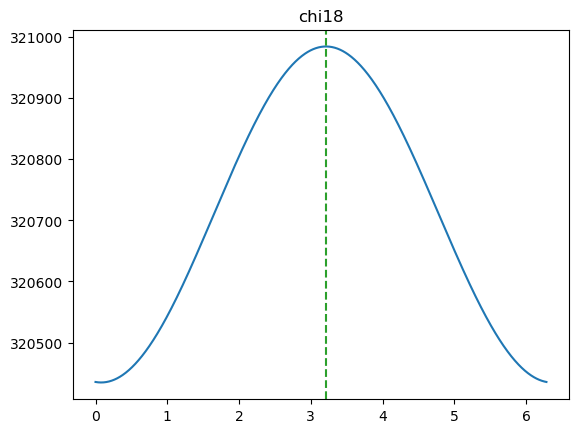

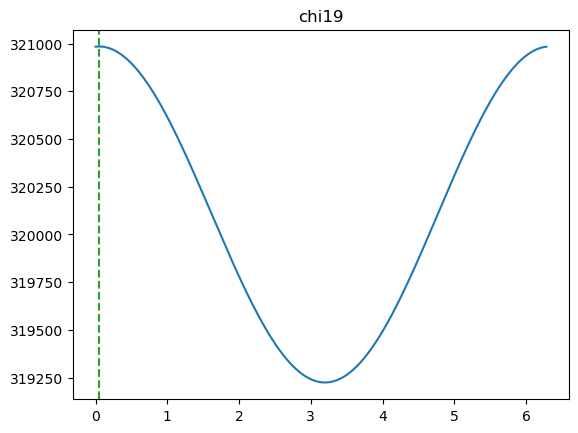

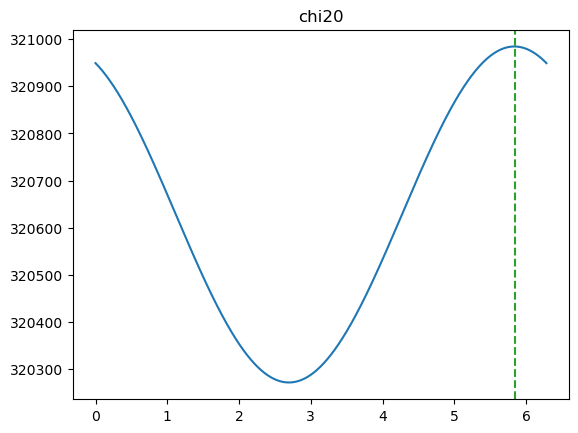

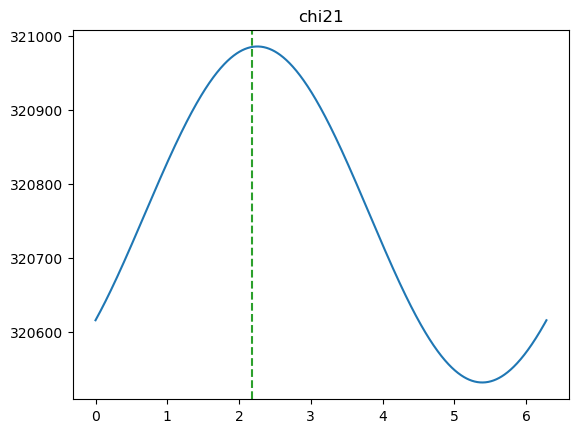

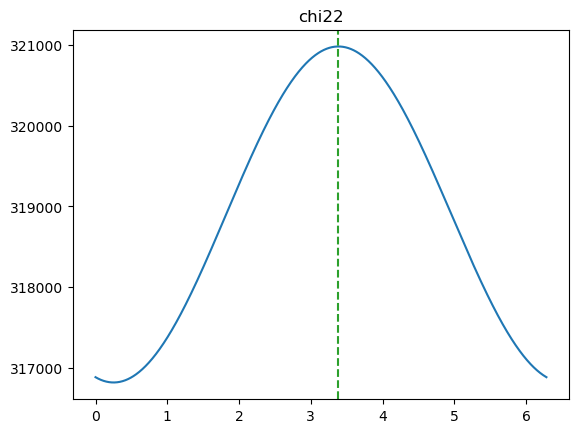

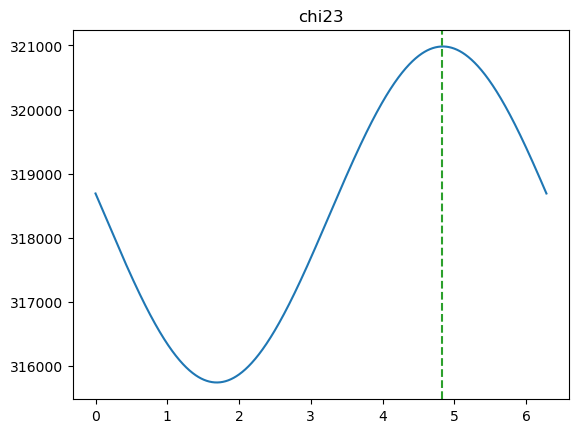

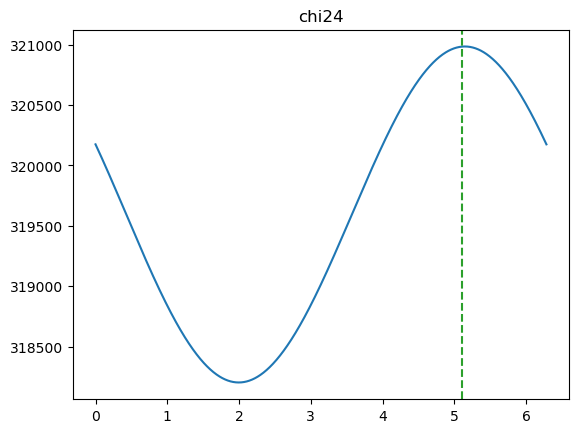

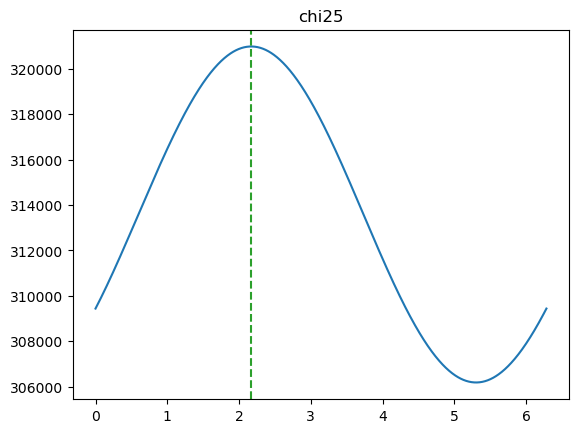

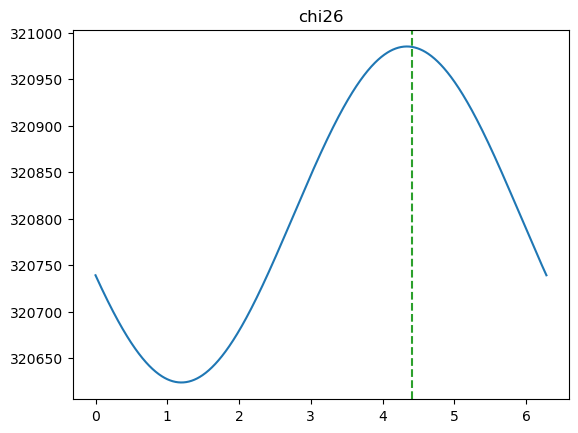

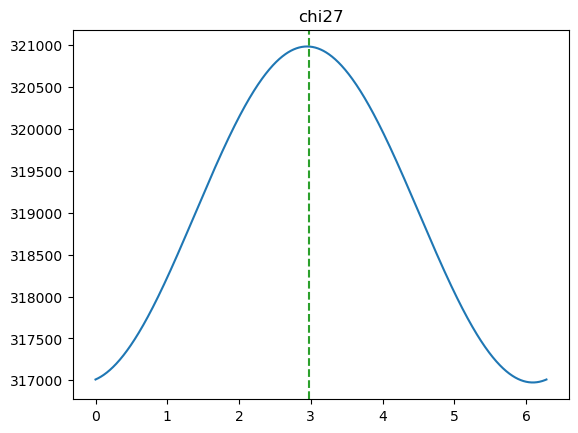

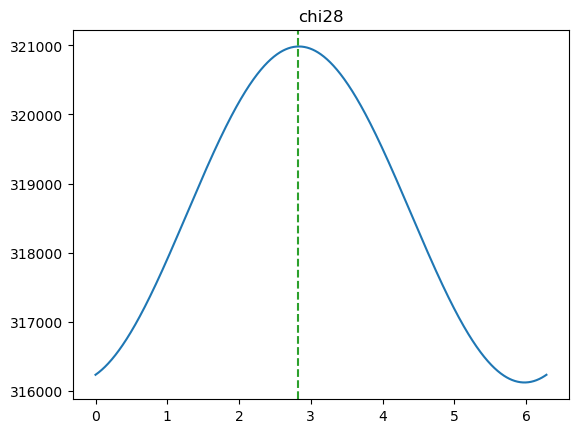

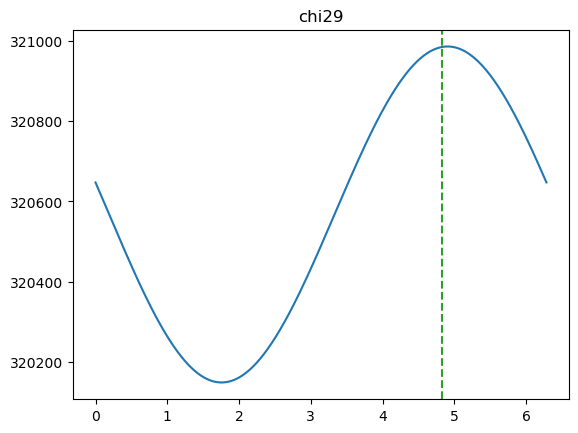

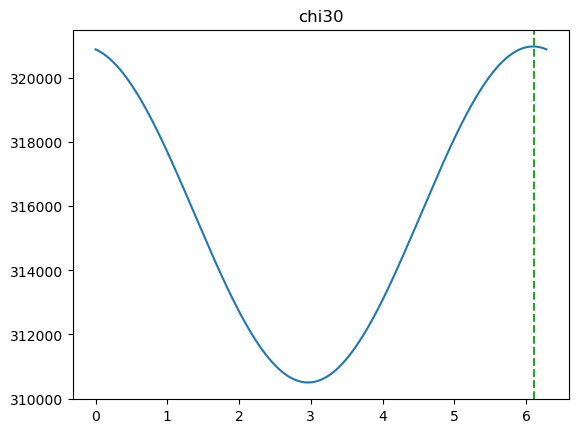

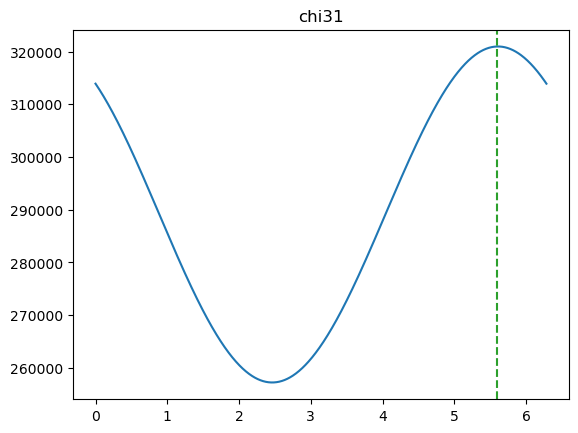

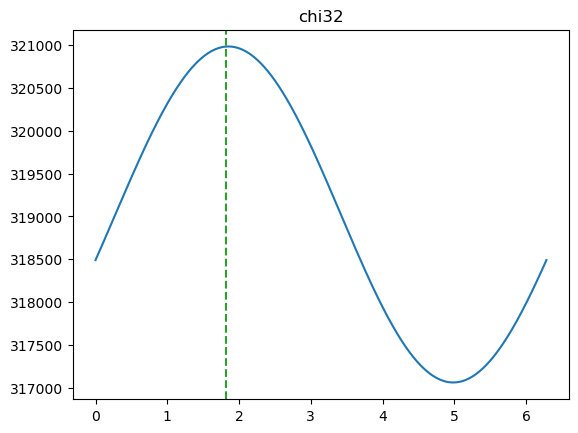

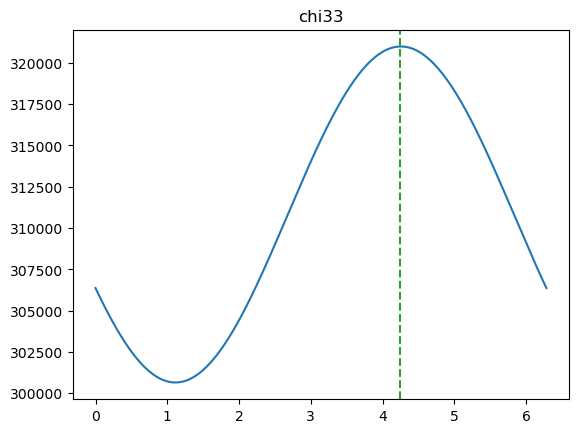

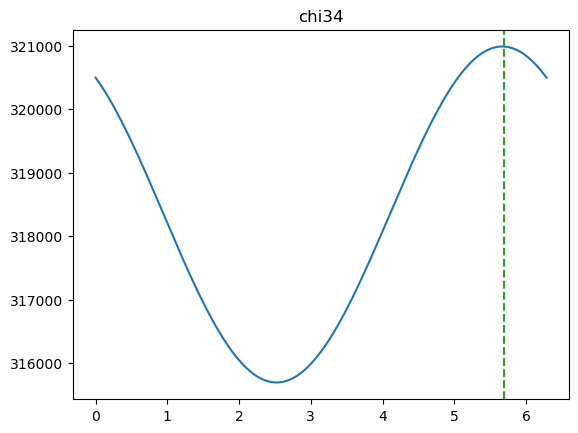

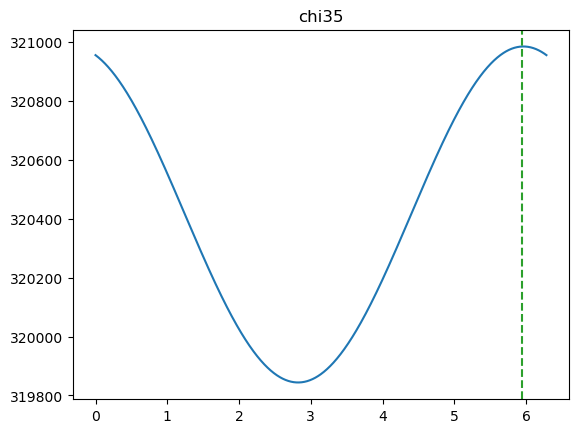

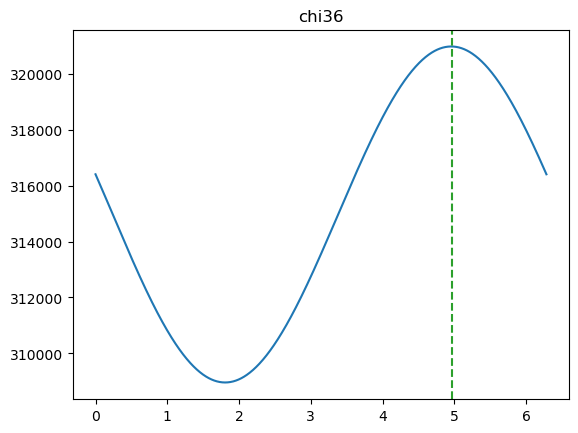

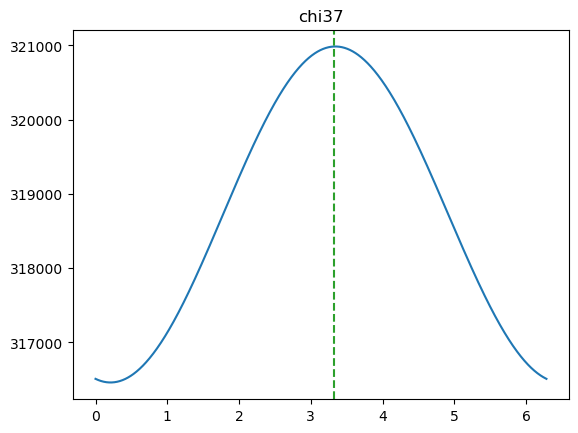

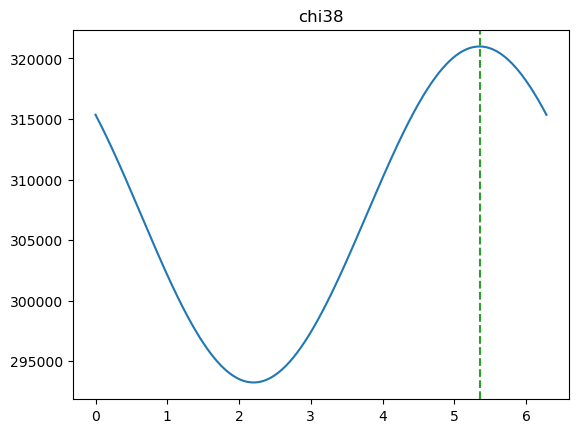

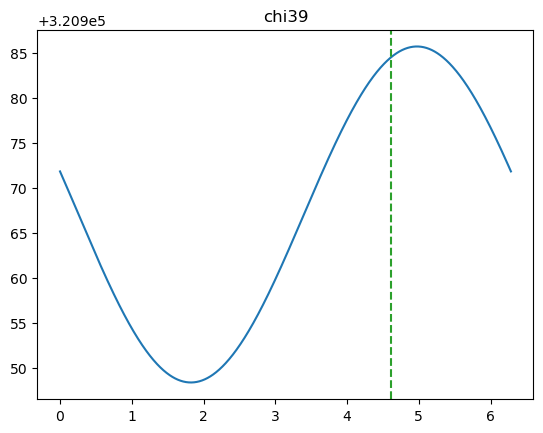

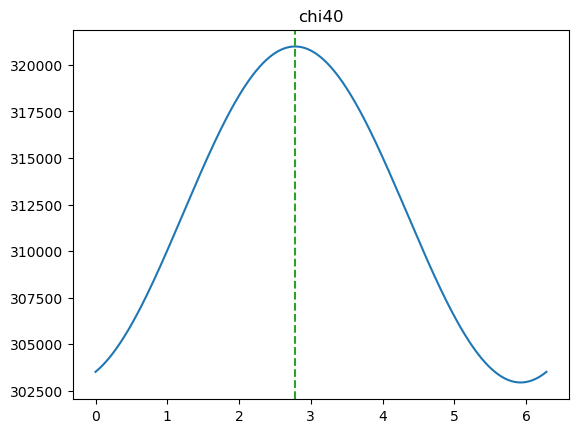

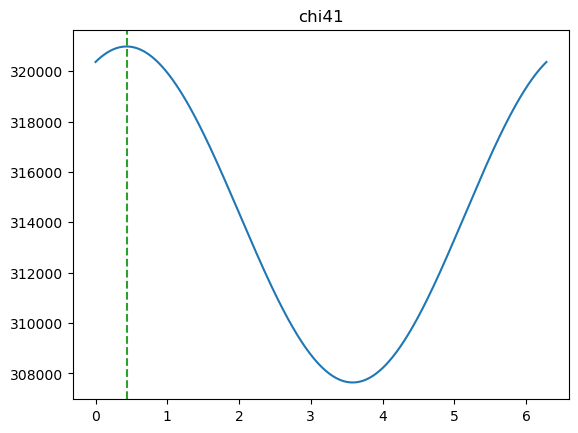

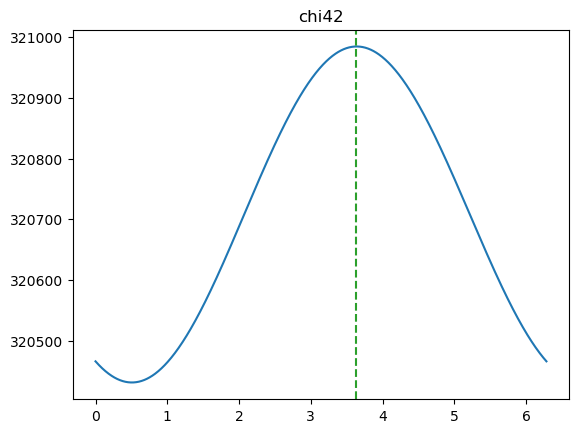

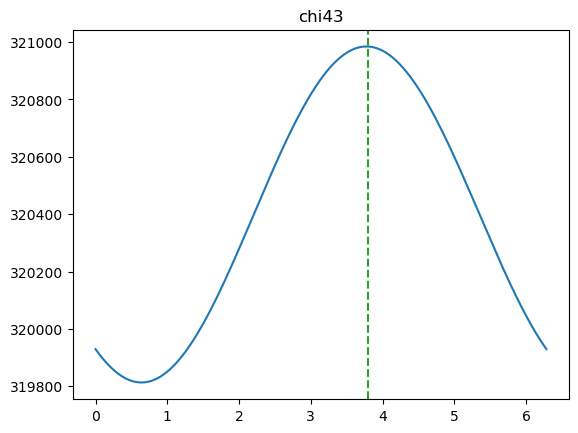

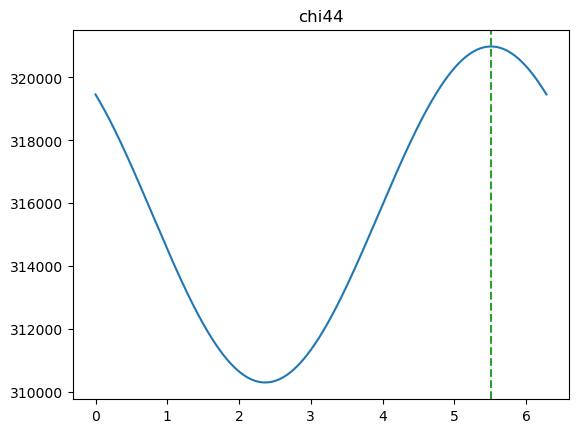

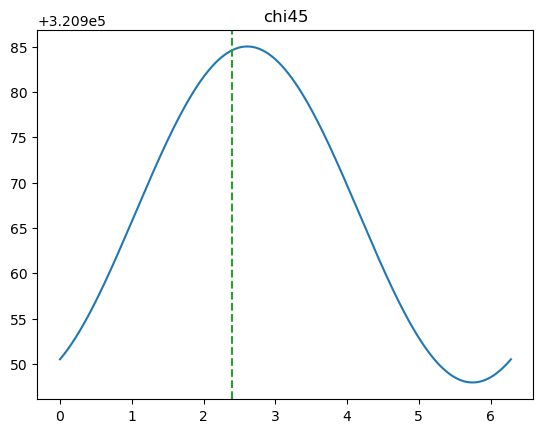

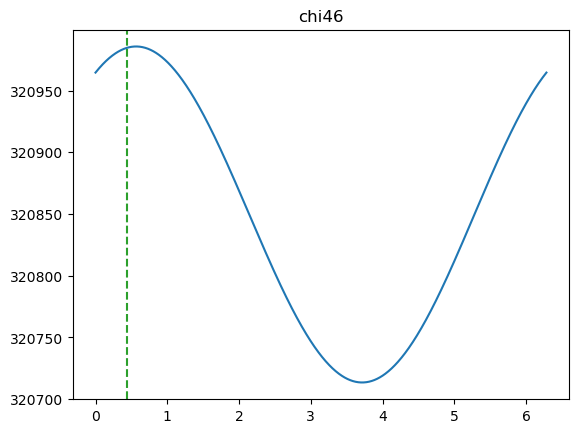

In [7]:
import logging 
logger = logging.getLogger()
logger.disabled = True


for j in range(PTA.Npsr):

    parameter_name = f"chi{j}"
    N = 1000
    parameter_values = np.linspace(0.0,2*np.pi,N)


    likelihoods_h = np.zeros_like(parameter_values)
    for i,parameter_value in enumerate(parameter_values):
        likelihoods_h[i] = iterate_over_ll(data,parameter_name,parameter_value,P,PTA)



    inj = PTA.χ[j]
    plt.plot(parameter_values,likelihoods_h)
    plt.axvline(inj,linestyle='--', c='C2')
    plt.title(parameter_name)
    plt.show()


## All $\chi$ values with lower noise 

In [28]:
P   = SystemParameters(σm=5e-13)    # User-specifed system parameters
PTA = Pulsars(P)            # All pulsar-related quantities
data = SyntheticData(PTA,P) # Given the user parameters and the PTA configuration, create some synthetic data    

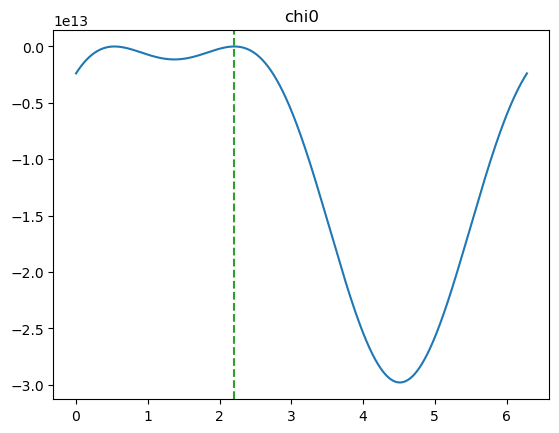

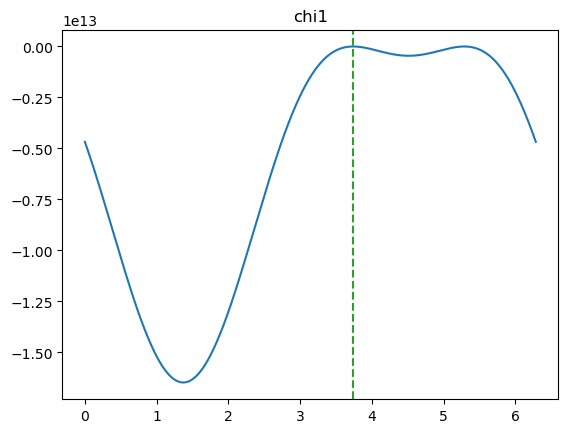

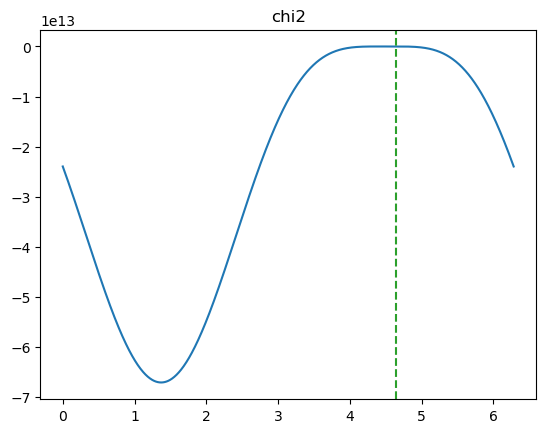

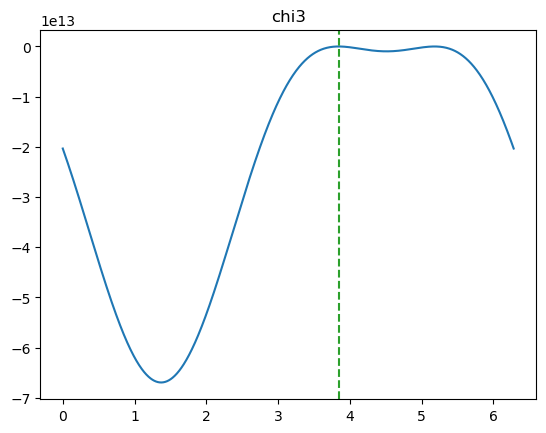

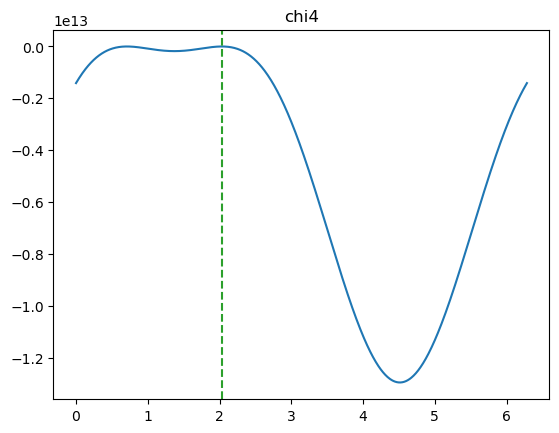

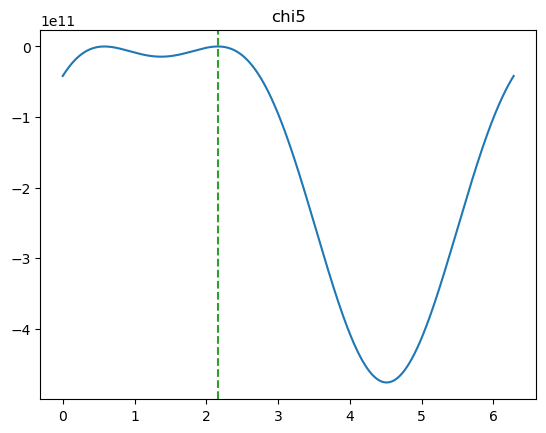

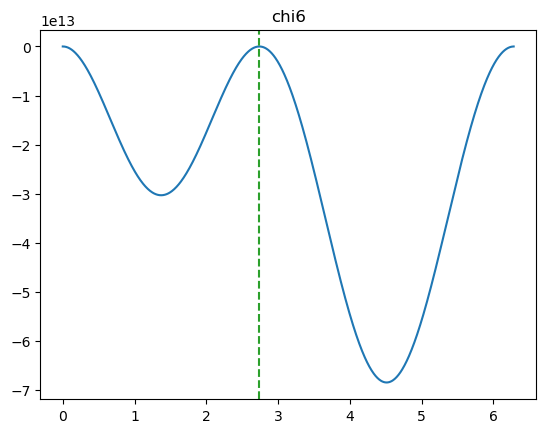

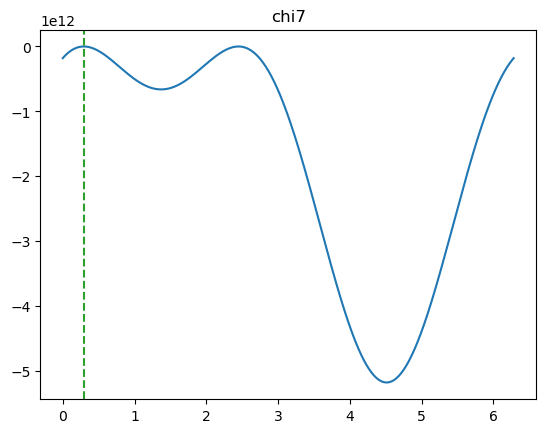

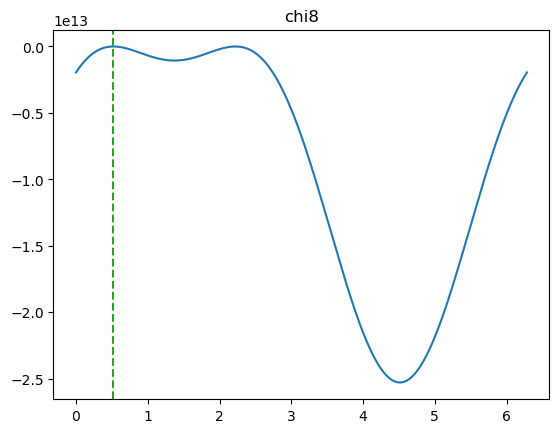

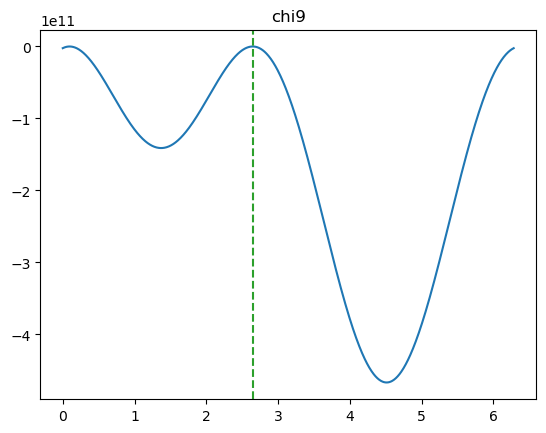

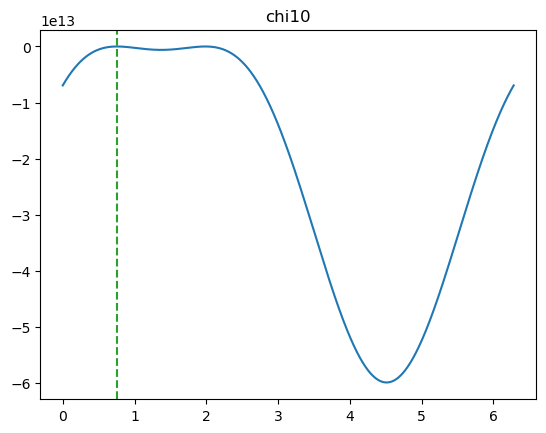

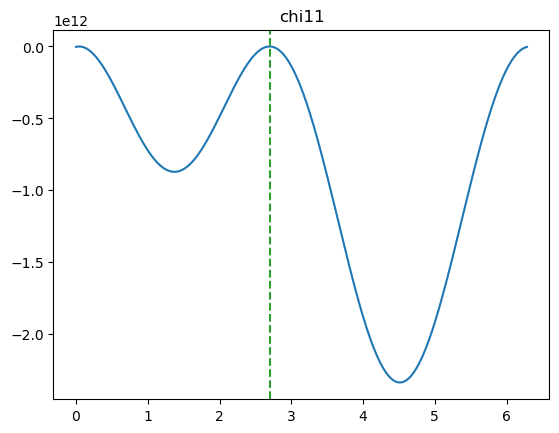

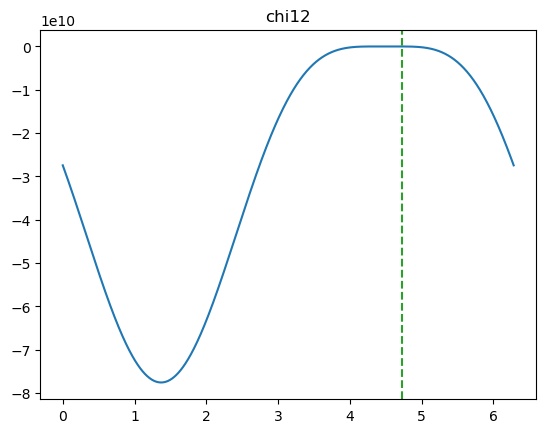

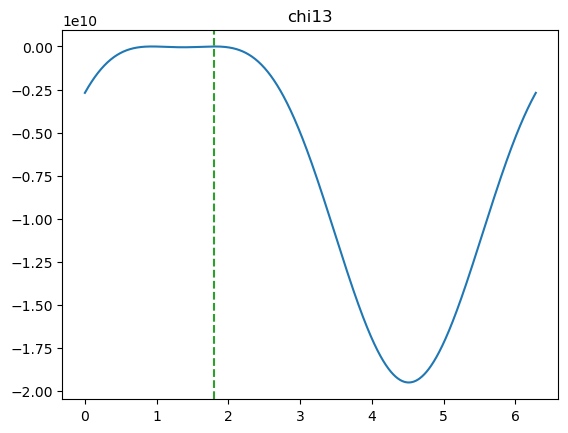

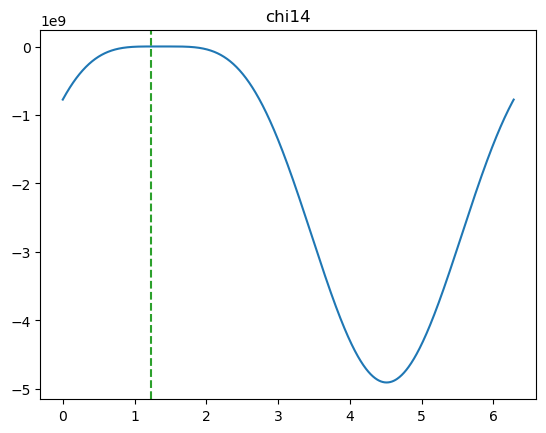

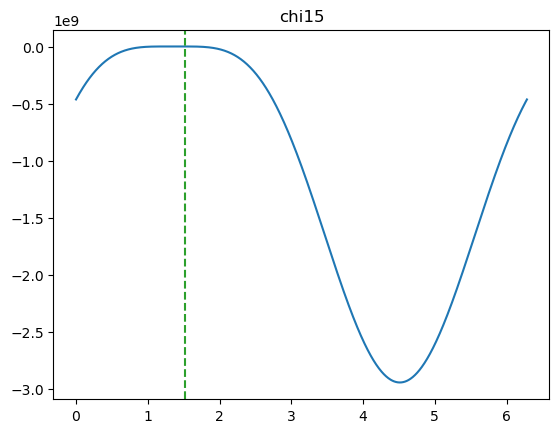

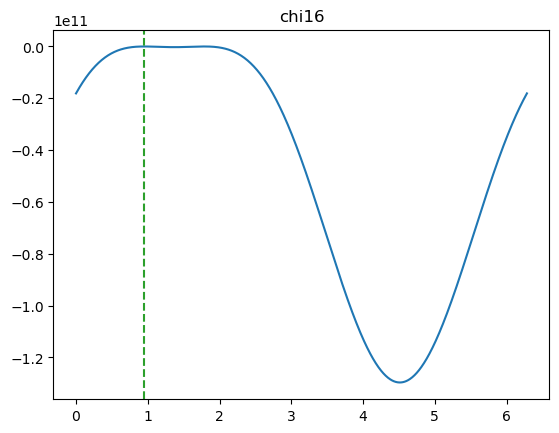

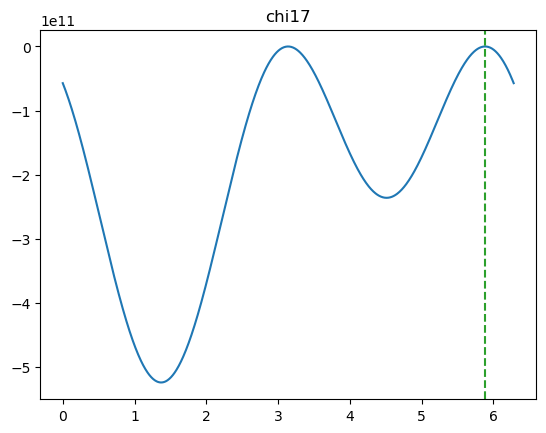

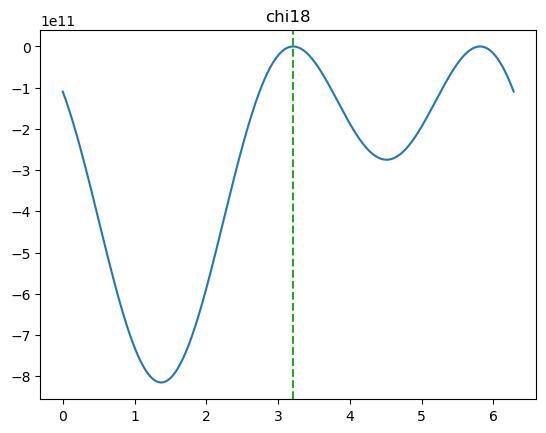

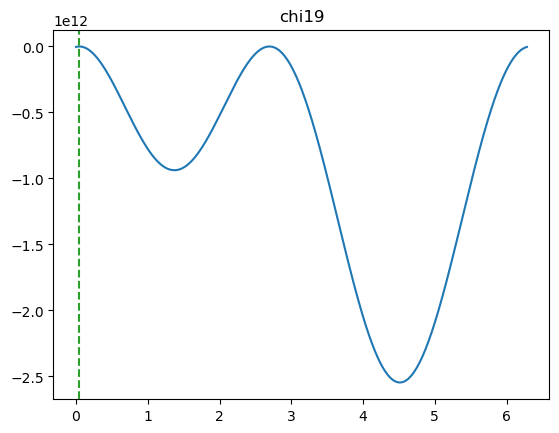

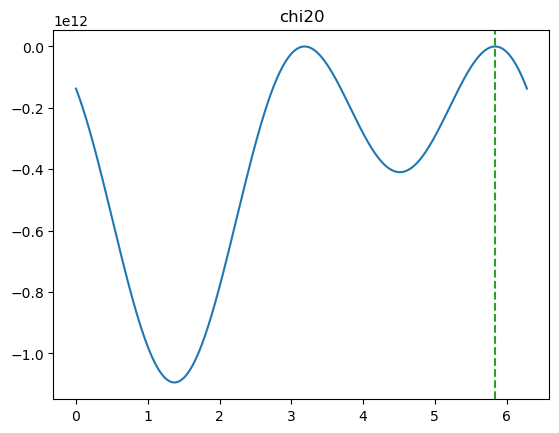

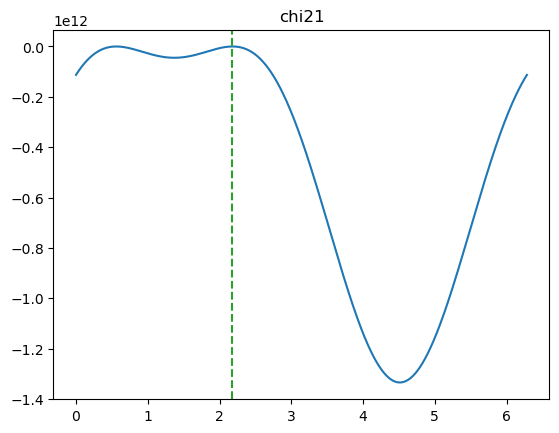

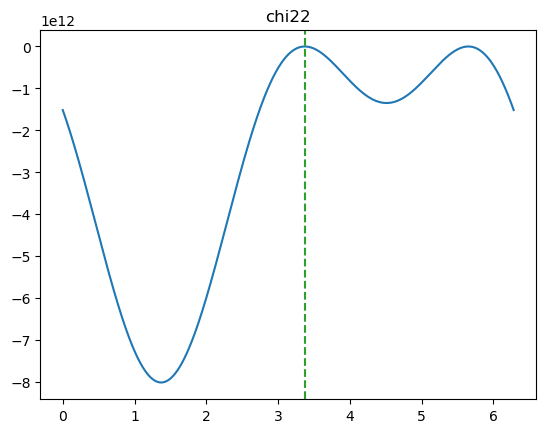

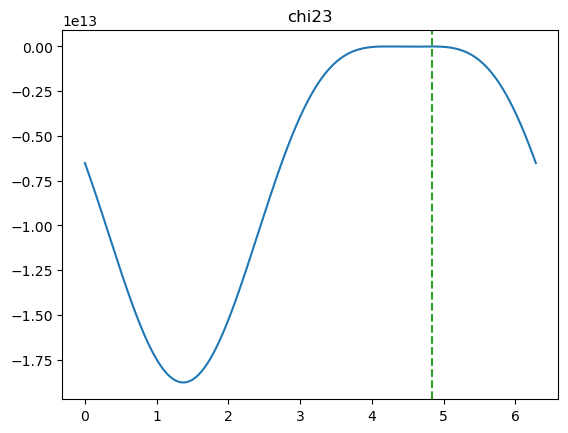

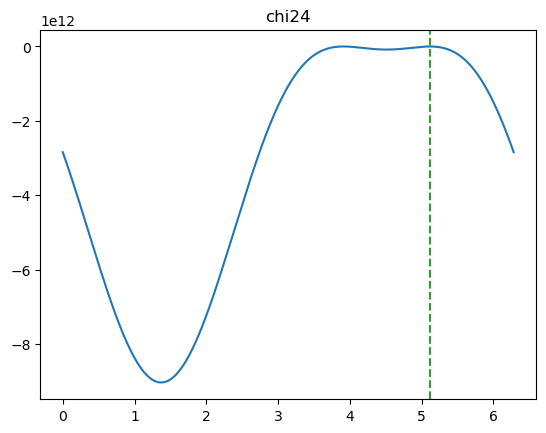

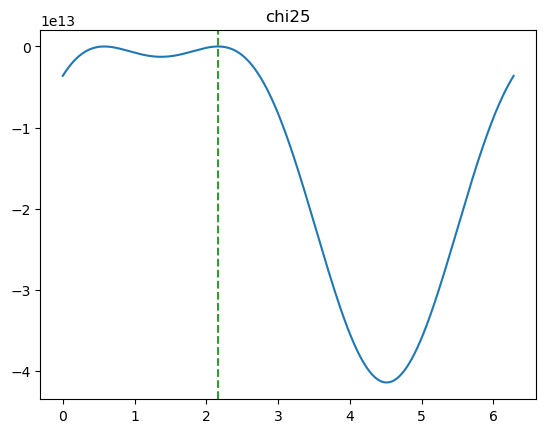

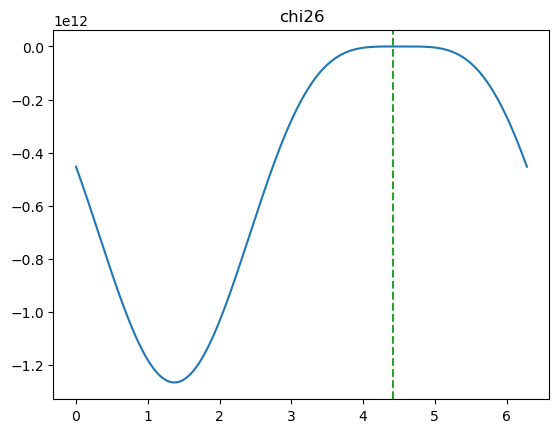

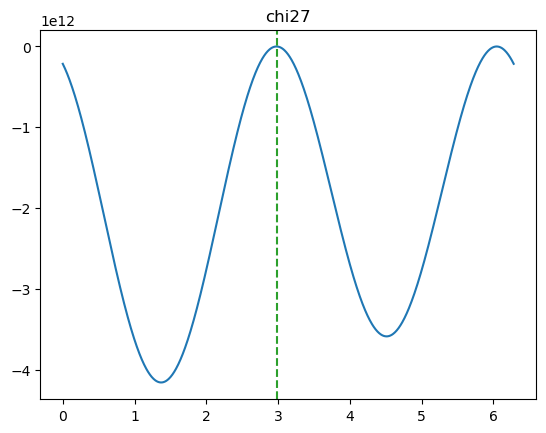

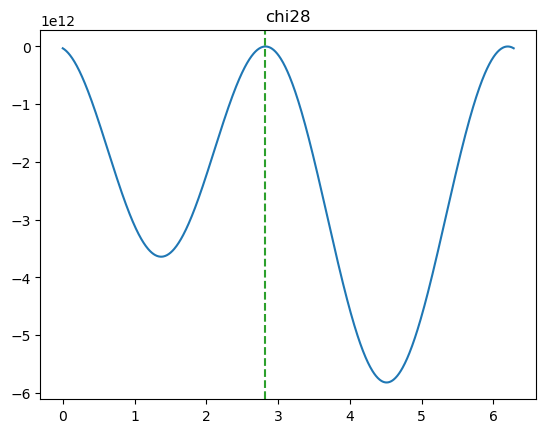

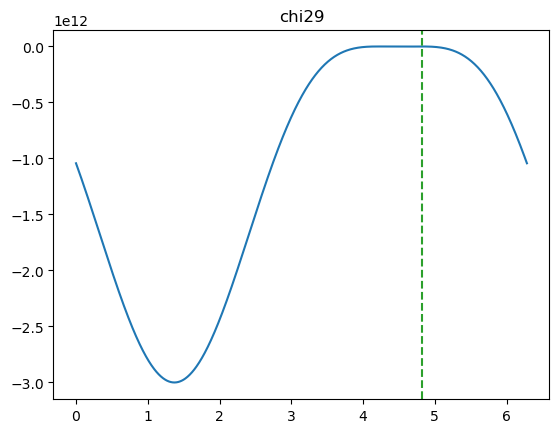

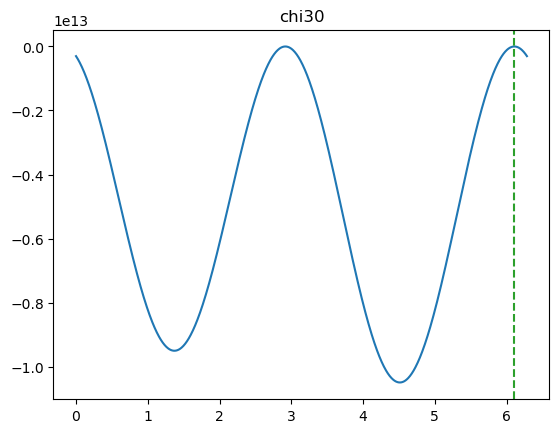

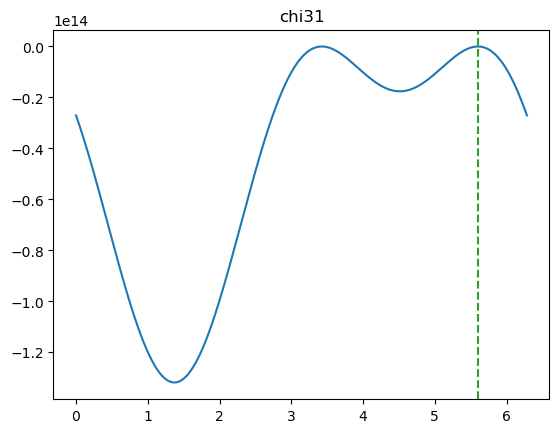

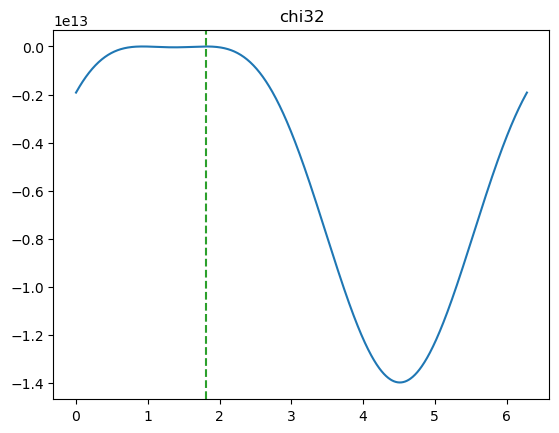

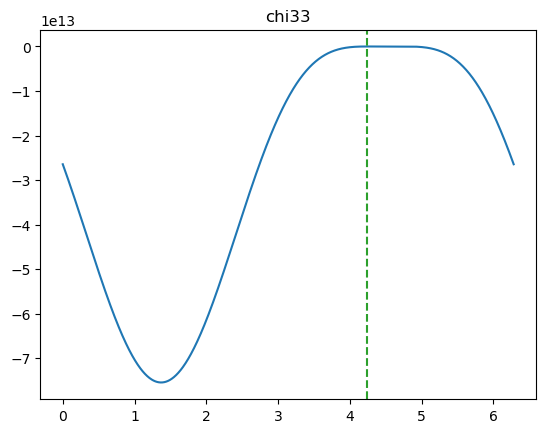

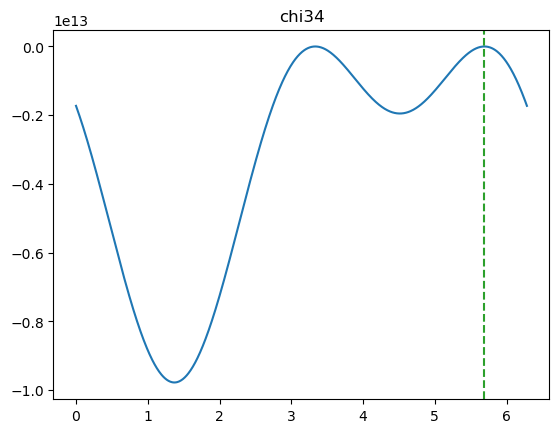

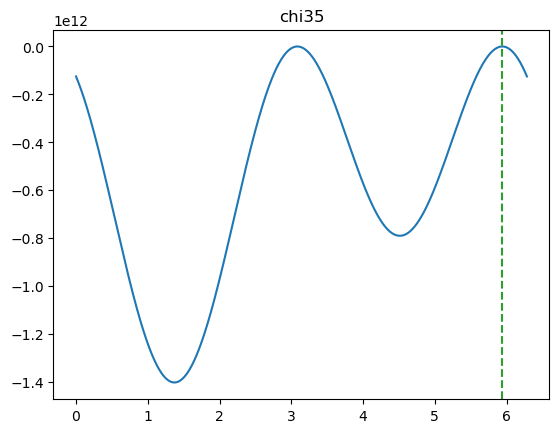

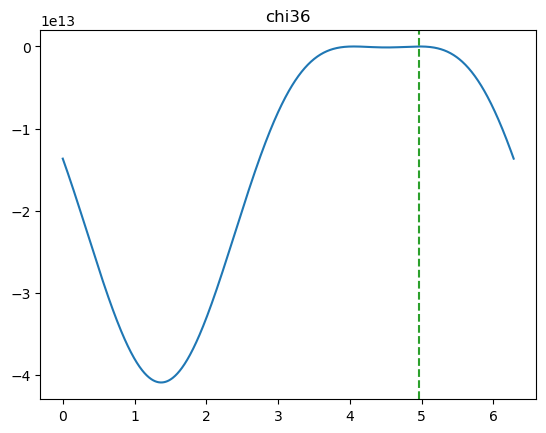

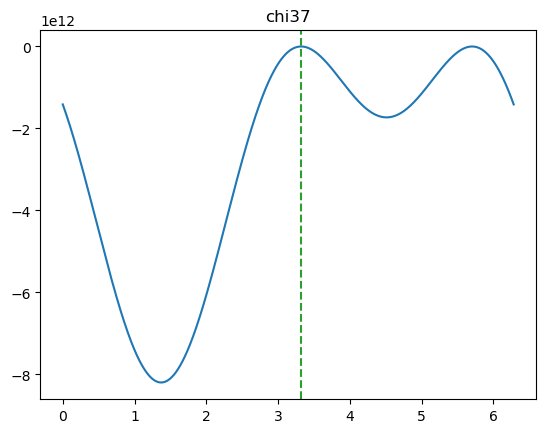

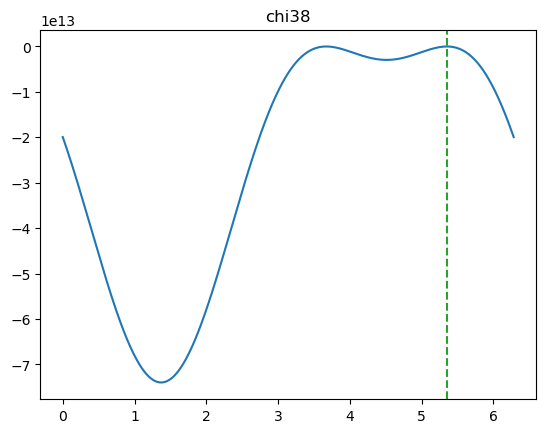

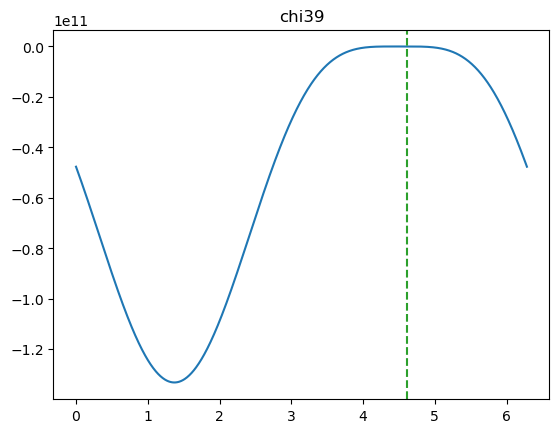

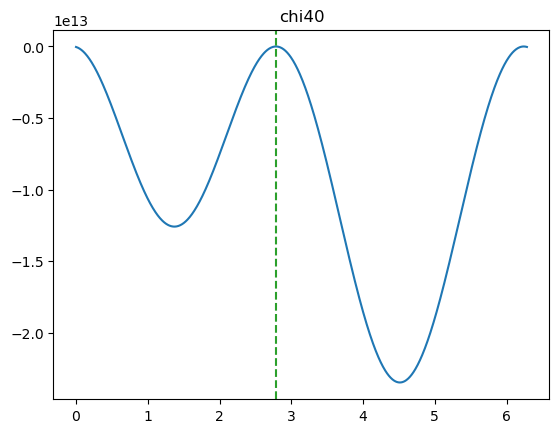

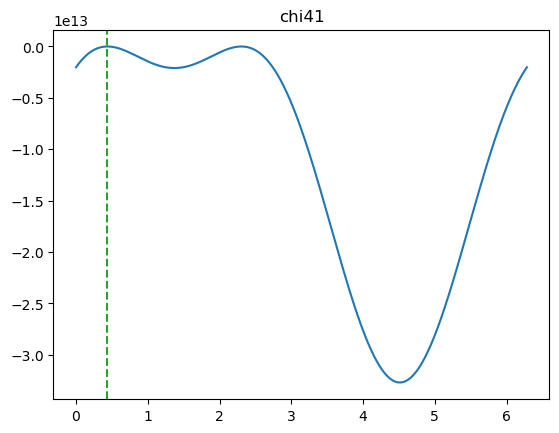

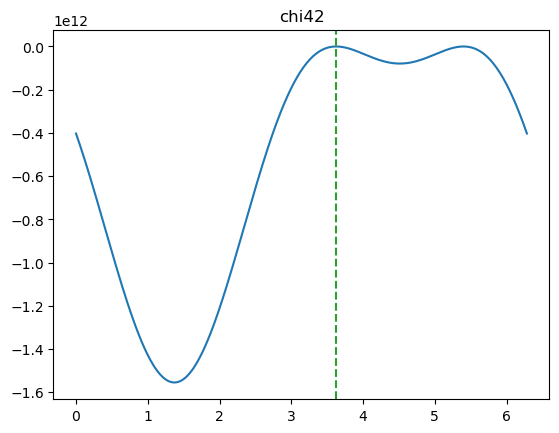

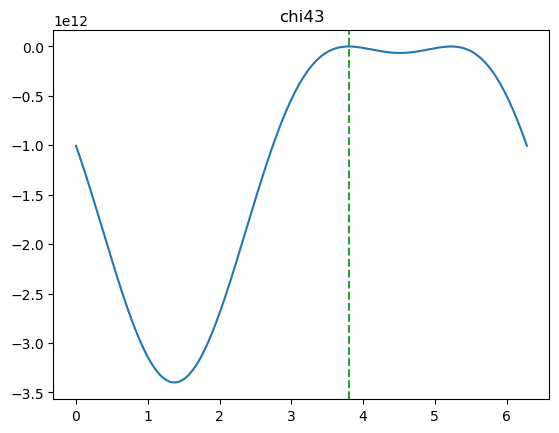

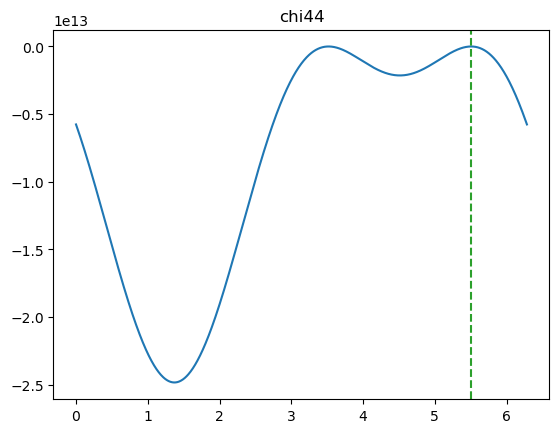

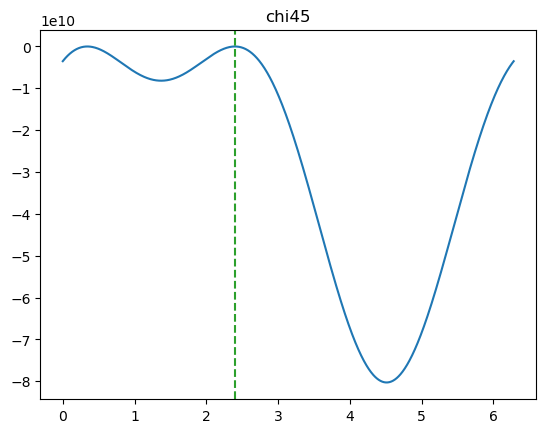

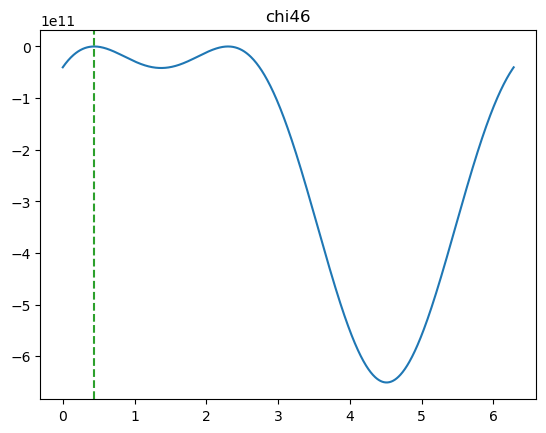

In [29]:
import logging 
logger = logging.getLogger()
logger.disabled = True


for j in range(PTA.Npsr):

    parameter_name = f"chi{j}"
    N = 1000
    parameter_values = np.linspace(0.0,2*np.pi,N)


    likelihoods_h = np.zeros_like(parameter_values)
    for i,parameter_value in enumerate(parameter_values):
        likelihoods_h[i] = iterate_over_ll(data,parameter_name,parameter_value,P,PTA)



    inj = PTA.χ[j]
    plt.plot(parameter_values,likelihoods_h)
    plt.axvline(inj,linestyle='--', c='C2')
    plt.title(parameter_name)
    plt.show()


# Whats going on with chi15?

In [9]:
P   = SystemParameters(σm=5e-7)    # User-specifed system parameters
PTA = Pulsars(P)            # All pulsar-related quantities
data = SyntheticData(PTA,P) # Given the user parameters and the PTA configuration, create some synthetic data    

In [10]:
PTA.χ[15]

1.5253105485847982

In [14]:
np.pi/2

1.5707963267948966

In [21]:
from system_parameters import SystemParameters
from pulsars import Pulsars
from synthetic_data import SyntheticData
import numpy as np 
from model import PhaseModel
from kalman_filter import KalmanFilter
from priors import bilby_priors_dict
import matplotlib.pyplot as plt 
P   = SystemParameters(σm=5e-13)    # User-specifed system parameters
PTA = Pulsars(P)            # All pulsar-related quantities
data = SyntheticData(PTA,P) # Given the user parameters and the PTA configuration, create some synthetic data    




def iterate_over_ll2(data,parameter_name,parameter_value,P,PTA):
   

    #Define the model to be used by the Kalman Filter
    model = PhaseModel(P,PTA)


    #Initialise the Kalman filter
    KF = KalmanFilter(model,data.phi_measured,PTA)



    inits, constrained_prior = bilby_priors_dict(PTA,P,set_state_parameters_as_known=True,set_measurement_parameters_as_known=True)
    optimal_parameters = constrained_prior.sample(1)
    optimal_parameters[parameter_name] = np.array([parameter_value])
    ll,xx,yy= KF.likelihood_plotter(optimal_parameters)

    return ll,xx,yy



In [22]:
j=15
parameter_name = f"chi{j}"
N = 1000
parameter_value = 2.2
ll,xx,yy = iterate_over_ll2(data,parameter_name,parameter_value,P,PTA)
print(ll)



-72415464.1238573


In [23]:
j=15
parameter_name = f"chi{j}"
N = 1000
parameter_value = PTA.χ[j]
ll,xx,yy = iterate_over_ll2(data,parameter_name,parameter_value,P,PTA)
print(ll)


466404.7815138275


In [ ]:
j=15
parameter_name = f"chi{j}"


parameter_value = 

likelihoods_h = np.zeros_like(parameter_values)
for i,parameter_value in enumerate(parameter_values):
    likelihoods_h[i] = iterate_over_ll2(data,parameter_name,parameter_value,P,PTA)



inj = PTA.χ[j]
plt.plot(parameter_values,likelihoods_h)
plt.axvline(inj,linestyle='--', c='C2')
plt.title(parameter_name)
plt.show()